# Aprendizagem Automática 2022/2023
Group 19\
Daniela Moutinho   	Nº 57064\
Diana Moreno         	Nº 51549\
Paulo Martins         	Nº 37426

## Second Home Assignment



The QSAR (Quantitative Structure Activity Relationships) Biodegradation dataset contains 41 attributes (molecular descriptors) used to classify 1055 chemicals into 2 classes: ready and not ready biodegradable. 

### Aims

. Provide the best possible classification models using whatever method\
. Variable to Classify is Biodegradable\
. Models should examine different hyperparameters and select the best one\
. Simple Cross Validation (testing=25%) for evaluating the models (same data partitions must be used for all models)

### Objectives

. Produce the best Classification model\
. Identify the most significant features

## Imports:

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns
#!pip install seaborn==0.11.0
#!pip install scikit-learn==0.24.1
#!pip install imblearn

## Exploratory Data Analysis (1.1)

We need to understand our dataset and the variables in study.

There are 42 variables, one of them is the target variable "Biodegradable".\
And the dataset has 4564 chemicals.

In [ ]:
biodeg.shape

(4564, 42)

In [ ]:
biodeg.describe()

,SpMax_L,J_Dz(e),nHM,F01,F04,NssssC,nCb,C,nCp,nO,...,nCrt,C_026,F02_CN,nHDon,SpMax_B,Psi_i_A,nN,SM6_B,nArCOOR,nX
count,4564.000000,4564.000000,4564.000000,4049.000000,4564.000000,4564.000000,4564.000000,3797.000000,3893.000000,4564.000000,...,4306.000000,4564.000000,4564.000000,4564.000000,3206.000000,4104.000000,4564.000000,4564.000000,4564.000000,3882.000000
mean,4.553679,3.103605,0.180762,0.010373,0.264680,0.069676,0.886503,35.100603,1.225790,2.048642,...,0.031584,0.332603,0.415644,0.777388,3.594392,2.633800,0.267090,8.133804,0.091805,0.170273
std,0.480677,0.618921,0.775172,0.127266,1.219524,0.541474,1.429565,8.287902,1.333277,1.509354,...,0.323204,0.903048,1.296882,1.160364,0.588620,0.615330,0.683133,0.897383,0.415705,1.151995
min,2.000000,0.803900,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,2.267000,1.467000,0.000000,4.917000,0.000000,0.000000
25%,4.297888,2.736054,0.000000,0.000000,0.000000,0.000000,0.000000,30.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,3.361406,2.188000,0.000000,7.700582,0.000000,0.000000
50%,4.579039,3.078901,0.000000,0.000000,0.000000,0.000000,0.000000,33.300000,1.000000,2.000000,...,0.000000,0.000000,0.000000,0.000000,3.529299,2.565157,0.000000,8.090426,0.000000,0.000000
75%,4.869022,3.417500,0.000000,0.000000,0.000000,0.000000,2.000000,41.362696,2.000000,3.000000,...,0.000000,0.000000,0.000000,1.000000,3.732744,2.952000,0.000000,8.560427,0.000000,0.000000
max,6.496000,9.177500,12.000000,3.000000,36.000000,13.000000,18.000000,60.700000,24.000000,12.000000,...,8.000000,12.000000,18.000000,7.000000,10.428000,5.825000,8.000000,14.700000,4.000000,27.000000


In [ ]:
#biodeg.info()

### Analyzing Target Variable: Biodegradable

y: "Biodegradable" (binary: ready biodegradable (RB) and not ready biodegradable (NRB))

In [ ]:
biodeg.Biodegradable.value_counts()

RB     3825
NRB     739
Name: Biodegradable, dtype: int64

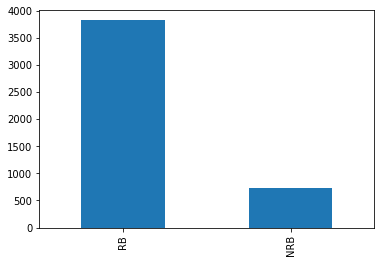

In [ ]:
biodeg.Biodegradable.value_counts().plot(kind="bar")

In [ ]:
a=3825/4564*100
b=739/4564*100
print("Percentage of each Biodegradable class:")
print(f"RB  = {a:.2f}% ")
print(f"NRB = {b:.2f}%")

Percentage of each Biodegradable class:
RB  = 83.81% 
NRB = 16.19%


The classes are not balanced! It should be balanced.\
Or else, for feature selection we should use, for example, Random Forests.

In [ ]:
# Let's change Biodegradable into a '0' and '1' category
biodeg['Biodegradable'] = biodeg['Biodegradable'].replace(['RB'], 1)
biodeg['Biodegradable'] = biodeg['Biodegradable'].replace(['NRB'], 0)

### Analyzing Independent Variables

We kept the 41 independent variables in the study.\
Let's take a look of differences between "Biodegradable" classes.\
Let's see the variables' mean differences among classes.

In [ ]:
biodeg.groupby('Biodegradable').mean()  #41 variables

,SpMax_L,J_Dz(e),nHM,F01,F04,NssssC,nCb,C,nCp,nO,...,nCrt,C_026,F02_CN,nHDon,SpMax_B,Psi_i_A,nN,SM6_B,nArCOOR,nX
Biodegradable,,,,,,,,,,,,,,,,,,,,,
0,4.930837,3.078459,1.002706,0.060332,1.331529,0.414073,2.156969,38.200593,1.456869,1.564276,...,0.175809,1.211096,1.679296,0.974290,4.107641,2.499526,0.874154,8.953120,0.016238,1.006240
1,4.480811,3.108463,0.021961,0.000591,0.058562,0.003137,0.641046,34.507257,1.181512,2.142222,...,0.003060,0.162876,0.171503,0.739346,3.495939,2.659346,0.149804,7.975511,0.106405,0.004937


Some variables seem to have very different values between the two "Biodegradable" classes. Those must be the most important for classification.
There are some binary, ordinal and continous variables.

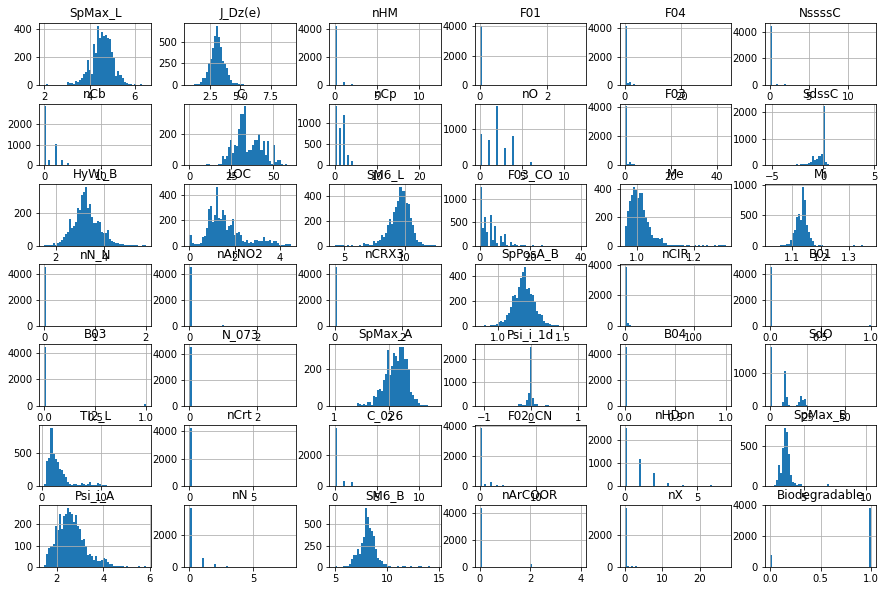

In [ ]:
biodeg.hist(bins=50, figsize=(15,10))
plt.show()

#### Variables correlation

Target variable Biodegradable is a binary variable, neither Spearman's or Pearson's correlation coefficient will give proper info.\
Binary logistic regression should be applied (see latter).

In [ ]:
#corr_matrix = biodeg.corr(method="pearson")  #spearman
#print("Correlation with'Biodegradable'(41 variables):")
#print(corr_matrix["Biodegradable"].sort_values(ascending=False))

In [ ]:
#sns.pairplot(biodeg_2)

#### Missing Values

In [ ]:

print("As seguintes colunas contêm missing values:")
space=" "
for i in biodeg:
   soma = biodeg[i].isna().sum()
   if soma > 0:
     print(i,(7-len(i))*space,"->",biodeg[i].isna().sum())


As seguintes colunas contêm missing values:
F01      -> 515
C        -> 767
nCp      -> 671
HyWi_B   -> 479
F03_CO   -> 43
Me       -> 448
nCIR     -> 490
SpMax_A  -> 674
SdO      -> 211
nCrt     -> 258
SpMax_B  -> 1358
Psi_i_A  -> 460
nX       -> 682


We could do a pre-selection of variables less correlated to "Biodegradable", with more missing values, and less diferent between classes of the predict variable, but let us instead proceed with all data, since machine learning algorithms during feature selection sould be able to choose the best features.

In [ ]:
biodeg=pd.read_csv("biodegradable_a.csv")
#biodeg=pd.read_csv("biodegradable_a.csv", na_filter=False)
biodeg.head()

,SpMax_L,J_Dz(e),nHM,F01,F04,NssssC,nCb,C,nCp,nO,...,C_026,F02_CN,nHDon,SpMax_B,Psi_i_A,nN,SM6_B,nArCOOR,nX,Biodegradable
0,3.919,2.6909,0.0,0.0,0.0,0.0,0.0,31.4,2.0,0.0,...,0.0,0.0,0.0,2.949,1.591,0.0,7.253,0.0,0.0,RB
1,4.170,2.1144,0.0,0.0,0.0,0.0,0.0,30.8,1.0,1.0,...,0.0,0.0,0.0,3.315,1.967,0.0,7.257,0.0,0.0,RB
2,3.932,3.2512,0.0,0.0,0.0,0.0,0.0,26.7,2.0,4.0,...,0.0,0.0,1.0,NaN,2.417,0.0,7.601,0.0,0.0,RB
3,3.000,2.7098,0.0,0.0,0.0,0.0,0.0,20.0,NaN,2.0,...,0.0,0.0,1.0,NaN,5.000,0.0,6.690,0.0,0.0,RB
4,4.236,3.3944,0.0,0.0,0.0,0.0,0.0,29.4,2.0,4.0,...,0.0,0.0,0.0,3.351,2.405,0.0,8.003,0.0,NaN,RB


## Processing Data

### Defining the variables

In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, Normalizer, PowerTransformer, MaxAbsScaler
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.feature_selection import RFE, SelectFromModel, SequentialFeatureSelector
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [ ]:
X = biodeg.drop(columns=["Biodegradable"])
y = biodeg["Biodegradable"]

### Scaling (1.2)

Not all algorithms need data to be scaled.\
Moreover we have binary and ordinal categoric data, together with continuous data.\
This makes it dificult to choose a proper scaler and maybe each variable should be treated independently.

However, we though the best approach would be to use MinMax scaler (0-1) on all the data. 

In [ ]:
scaler   = MinMaxScaler() #StandardScaler() #PowerTransformer() #MinMaxScaler()   
scaler.fit(X)
X = scaler.transform(X)

### Imputing for Missing Values (1.2)

Again, we have binary/ordinal data, and to impute missing values we should not use the "mean" or "median", but the "mode".\
Thus, we decided to use the KNN method that uses the mean value to estimate the value for continuous data and the mode value to replace the missing values when the data is categorical.

In [ ]:
imp = KNNImputer(n_neighbors=2, weights="uniform") 
imp.fit(X)
X = imp.transform(X)

## Feature Selection (2)

### Imports

In [ ]:
from sklearn.model_selection import train_test_split, KFold
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, f1_score, matthews_corrcoef, confusion_matrix, accuracy_score
from sklearn.metrics import explained_variance_score, mean_squared_error

### Splitting Data into Training and Test Sets (2.1)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=123)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((3423, 41), (1141, 41), (3423,), (1141,))

### Feature Selection Methods

#### Using Random Forest for Feature Importance (2.2)

In [ ]:
N,M=X_train.shape
rfc=RandomForestClassifier(n_estimators=500, max_depth=None, random_state=0) #(n_estimators=100, *, criterion='gini', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='sqrt', max_leaf_nodes=None, min_impurity_decrease=0.0, bootstrap=True, oob_score=False, n_jobs=None, random_state=None, verbose=0, warm_start=False, class_weight=None, ccp_alpha=0.0, max_samples=None)
sel = SelectFromModel(estimator=rfc)
sel.fit(X_train, y_train)

print("Importances: ", sel.estimator_.feature_importances_)
print("Default threshold: ", sel.threshold_)

features=sel.get_support()
Features_selected =np.arange(M)[features]
print("The features selected are columns: ", Features_selected)

rfX_train=sel.transform(X_train)
rfX_test=sel.transform(X_test)

Importances:  [0.04509986 0.02179418 0.08472687 0.00206664 0.05923447 0.04385037
 0.05091058 0.02258461 0.01669769 0.01158381 0.04690068 0.02105343
 0.02071162 0.01896096 0.02412871 0.0109505  0.02296535 0.02131618
 0.00050739 0.00581712 0.0003012  0.04368941 0.02571707 0.00083078
 0.00952675 0.00052897 0.03264181 0.01377775 0.00019944 0.01764275
 0.0172189  0.01636798 0.0212968  0.04529275 0.00645654 0.06802738
 0.02466761 0.01688892 0.03231025 0.00095482 0.05380106]
Default threshold:  0.02439024390243903
The features selected are columns:  [ 0  2  4  5  6 10 21 22 26 33 35 36 38 40]


In [ ]:
b = biodeg.drop(columns=["Biodegradable"])
SF=pd.DataFrame(X,columns=b.columns)
SF["Biodegradable"] = biodeg["Biodegradable"].values
bioSF=SF.iloc[:,[0,2,4,5,6,10,21,22,26,33,35,36,38,40,41]]
#bioSF.groupby('Biodegradable').mean()

,SpMax_L,nHM,F04,NssssC,nCb,F03,SpPosA_B,nCIR,SpMax_A,F02_CN,SpMax_B,Psi_i_A,SM6_B,nX
Biodegradable,,,,,,,,,,,,,,
0,0.651876,0.083559,0.036987,0.031852,0.119832,0.044163,0.516092,0.012054,0.685652,0.093294,0.225208,0.238168,0.412565,0.037513
1,0.551782,0.001830,0.001627,0.000241,0.035614,0.002591,0.418598,0.003398,0.587832,0.009528,0.150203,0.273707,0.312635,0.000189


#### Using Logistic Regression for Sequential Feature Selection (2.3)

In [ ]:
N,M=X_train.shape
lgr=LogisticRegression(multi_class="ovr", random_state=0)
sfs = SequentialFeatureSelector(lgr, n_features_to_select=14)
sfs.fit(X_train, y_train)

features=sfs.get_support()
Features_selected =np.arange(M)[features]
print("The features selected are columns: ", Features_selected)

lgX_train=sfs.transform(X_train)
lgX_test=sfs.transform(X_test)

The features selected are columns:  [ 2  5  6  8  9 19 21 26 31 32 33 35 37 39]


In [ ]:
bioLG=SF.iloc[:,[2,5,6,8,9,19,21,26,31,32,33,35,37,39,41]]

In [ ]:
#bioLG.groupby('Biodegradable').mean()

### Which are the most importante features?

Feature importance given by Random forests tell us the most important features are SpMax_L, nHM, F04, NssssC, nCb, F03,	SpPosA_B,	nCIR,	SpMax_A,	F02_CN,	SpMax_B,	Psi_i_A,	SM6_B, and	nX (15 variables).

However, logistic regression seem indicate nHM,	NssssC,	nCb,	nCp,	nO,	nArNO2,	SpPosA_B,	SpMax_A,	nCrt,	C_026,	F02_CN,	SpMax_B,	nN and	nArCOOR. The ones in common are nHM, NssssC, nCb, SpPosA_B, SpMax_A, F02_CN and SpMax_B.

In [ ]:
bioMIX=SF.iloc[:,[2,5,6,21,26,33,35,41]]
bioMIX.groupby('Biodegradable').mean()

,nHM,NssssC,nCb,SpPosA_B,SpMax_A,F02_CN,SpMax_B
Biodegradable,,,,,,,
0,0.083559,0.031852,0.119832,0.516092,0.685652,0.093294,0.225208
1,0.001830,0.000241,0.035614,0.418598,0.587832,0.009528,0.150203


##### Naif Model testing definition:

In [ ]:
def naif_model_testing(X_train, X_test, y_train, y_test):
        
    rfc= RandomForestClassifier(n_estimators=100, random_state=123)
    rfc.fit(X_train, y_train)

    dtc= DecisionTreeClassifier(max_depth=None, random_state=123)
    dtc.fit(X_train, y_train)

    lgr=LogisticRegression(multi_class="ovr", random_state=123)
    lgr.fit(X_train, y_train)
    
    knn=KNeighborsClassifier(n_neighbors=2, weights="distance")
    knn.fit(X_train, y_train,)
       
    svm=SVC(random_state=123)
    svm.fit(X_train, y_train)
    
    rf_preds=rfc.predict(X_test)
    rfc_score=rfc.score(X_test,y_test)
    
    dt_preds=dtc.predict(X_test)
    dtc_score=dtc.score(X_test,y_test)
    
    lr_preds=lgr.predict(X_test)
    lgr_score=lgr.score(X_test,y_test)
    
    knn_preds=knn.predict(X_test)
    knn_score=knn.score(X_test,y_test)
    
    svm_preds=svm.predict(X_test)
    svm_score=svm.score(X_test,y_test)

    print("Logistic Regression")       
    print("RVE:   %7.4f" % explained_variance_score(y_test, lr_preds))
    print("Score: %7.4f" % lgr_score)
    print("KNNeighbors Classifier")  
    print("RVE:   %7.4f" % explained_variance_score(y_test, knn_preds))
    print("Score: %7.4f" % knn_score)
    print("Suport Vector Machine Classifier")
    print("RVE:   %7.4f" % explained_variance_score(y_test, svm_preds))
    print("Score: %7.4f" % svm_score)
    print("Random Forest Classifier")
    print("RVE:   %7.4f" % explained_variance_score(y_test, rf_preds))
    print("Score: %7.4f" % rfc_score)
    print("Decision Trees Classifier")
    print("RVE:   %7.4f" % explained_variance_score(y_test, dt_preds))
    print("Score: %7.4f" % dtc_score)


#### Naif testing for All Features (2.4)

In [ ]:
naif_model_testing(X_train, X_test, y_train, y_test)

Logistic Regression
RVE:    0.5013
Score:  0.9264
KNNeighbors Classifier
RVE:    0.7139
Score:  0.9588
Suport Vector Machine Classifier
RVE:    0.5558
Score:  0.9351
Random Forest Classifier
RVE:    0.7968
Score:  0.9711
Decision Trees Classifier
RVE:    0.6665
Score:  0.9527


#### Naif Testing for Selected Features using Random Forest (2.4)

In [ ]:
naif_model_testing(rfX_train, rfX_test, y_train, y_test)

Logistic Regression
RVE:    0.4098
Score:  0.9097
KNNeighbors Classifier
RVE:    0.7009
Score:  0.9571
Suport Vector Machine Classifier
RVE:    0.5535
Score:  0.9334
Random Forest Classifier
RVE:    0.7480
Score:  0.9641
Decision Trees Classifier
RVE:    0.6008
Score:  0.9430


#### Naif Testing for Selected Features Using Logistic Regression (2.4)

In [ ]:
naif_model_testing(lgX_train, lgX_test, y_train, y_test)

Logistic Regression
RVE:    0.4358
Score:  0.9141
KNNeighbors Classifier
RVE:    0.6579
Score:  0.9509
Suport Vector Machine Classifier
RVE:    0.5952
Score:  0.9404
Random Forest Classifier
RVE:    0.7416
Score:  0.9632
Decision Trees Classifier
RVE:    0.6476
Score:  0.9500


## Model Validation and Selection (3, 3.1)

### Grid Search Cross Validation for the entire dataset (3, 3.1)

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score, confusion_matrix,matthews_corrcoef, precision_score, recall_score
from multiprocessing import Process
from time import process_time
grid_searchList = []

# Define the models to be evaluated
models = [
    LogisticRegression(multi_class="ovr",random_state=42),
    KNeighborsClassifier(),
    SVC(random_state=42),
    RandomForestClassifier(random_state=42),
    DecisionTreeClassifier(random_state=42)
]

# Define the grid of hyperparameters to be searched
param_grids = [
    {
        # default=1.0, smaller values specify stronger regularization
        'C': [1e-1, 1e-2, 1e-3, 1e-4, 1e-5],
        # default=’l2’
        'penalty': ['l1', 'l2'],
        #  default=’lbfgs’
        'solver': ['liblinear'],
        #  default=1e-4, Tolerance for stopping criteria
        'tol':[1e-3, 1e-4, 1e-5]
    },
    {   
        # default=5
        'n_neighbors': [1,5,10, 15],
        # default=’uniform’
        'weights': ["uniform", "distance"]
    },
    {
        # default=1.0, The strength of the regularization is inversely proportional to C
        'C': [0.001, 0.1, 1, 10, 100, 1e3],
        # default=’scale’
        'gamma': ['scale', 'auto'],#, 1e-1, 1e-2, 1e-3, 1e-4],
        # default=’rbf’
        'kernel': [ 'rbf', 'linear', 'poly']#, 'sigmoid']
    },
    {
        # default=100, The number of trees in the forest
        'n_estimators': [100, 200, 300],
        # default=None
        'max_depth': [None, 5, 10, 20, 40, 50],
        # default=2, The minimum number of samples required to split an internal node
        'min_samples_split': [2],# 3, 4],
        # default=”gini”
        'criterion': ['gini', 'entropy']#, 'log_loss']
    },
    {
        # default="gini", quality of a split
        'criterion': ['gini','entropy'],
        # default=None
        'max_depth': [None, 5, 10, 20, 40, 50],
        # default=2, The minimum number of samples required to split an internal node
        'min_samples_split': [2, 3, 4],
        # default=”best”
        'splitter': ['best', 'random'],
        # default="None"
        'class_weight':['balanced']
     }

]
y_trainCasted=y_train.astype('int')
y_testCasted=y_test.astype('int')

def f(model, param_grid, i):
    start_time = process_time()
    grid_search = GridSearchCV(model, param_grid, cv=3, scoring='f1')
    grid_search.fit(X_train, y_trainCasted)
    grid_searchList.append(grid_search)
    
    # Print the best hyperparameters and the corresponding validation accuracy
    print("model #", i)
    print("model name", model)
    print(grid_search.best_params_)
    print("Score:", grid_search.best_score_)
    preds=grid_search.best_estimator_.predict(X_test)
    print("MCC: %7.4f" % matthews_corrcoef(y_testCasted, preds))
    print("Prc: %7.4f" % precision_score(y_testCasted, preds))
    print("Rec: %7.4f" % recall_score(y_testCasted, preds))
    print("F1 : %7.4f" % f1_score(y_testCasted, preds)) 
    print("This is the Confusion Matrix")
    print(pd.DataFrame(confusion_matrix(y_testCasted, preds)))
    end_time = process_time()
    print("Elapsed time in seconds:", end_time - start_time)
    print("-----------------------------------------------")
    
procs = []

# Perform grid search cross-validation with 3-fold stratified cross-validation
# Before Multi-Processing: 63 seconds
for model, param_grid, i in zip(models, param_grids, range(len(models))):
    p = Process(target=f, args=(model, param_grid, i))
    procs.append(p)
    p.start()
    #p.join()

for proc in procs:
  proc.join()

for grid_search in grid_searchList:
    res = pd.DataFrame(grid_search.cv_results_)
    res = res.sort_values(by=["rank_test_score"])
    res[["params", "rank_test_score", "mean_test_score", "std_test_score"]]

model # 0
model name LogisticRegression(multi_class='ovr', random_state=42)
{'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear', 'tol': 0.001}
Score: 0.9370524450239083
MCC:  0.6129
Prc:  0.8994
Rec:  0.9926
F1 :  0.9437
This is the Confusion Matrix
    0    1
0  90  105
1   7  939
Elapsed time in seconds: 2.863485901
-----------------------------------------------
model # 1
model name KNeighborsClassifier()
{'n_neighbors': 1, 'weights': 'uniform'}
Score: 0.9731131189019734
MCC:  0.8494
Prc:  0.9610
Rec:  0.9905
F1 :  0.9755
This is the Confusion Matrix
     0    1
0  157   38
1    9  937
Elapsed time in seconds: 3.782071126
-----------------------------------------------
model # 4
model name DecisionTreeClassifier(random_state=42)
{'class_weight': 'balanced', 'criterion': 'entropy', 'max_depth': None, 'min_samples_split': 2, 'splitter': 'best'}
Score: 0.9661842174897481
MCC:  0.8186
Prc:  0.9616
Rec:  0.9789
F1 :  0.9701
This is the Confusion Matrix
     0    1
0  158   37
1   20  926
E

### Grid Search Cross Validation for the features chosen by randomforests (3, 3.1)

In [ ]:
def f(model, param_grid, i):
    start_time = process_time()
    grid_search = GridSearchCV(model, param_grid, cv=3, scoring='f1')
    grid_search.fit(rfX_train, y_trainCasted)
    grid_searchList.append(grid_search)
    
    print("model #", i)
    print("model name", model)
    print(grid_search.best_params_)
    print("Score:", grid_search.best_score_)
    preds=grid_search.best_estimator_.predict(rfX_test)
    print("MCC: %7.4f" % matthews_corrcoef(y_testCasted, preds))
    print("Prc: %7.4f" % precision_score(y_testCasted, preds))
    print("Rec: %7.4f" % recall_score(y_testCasted, preds))
    print("F1 : %7.4f" % f1_score(y_testCasted, preds)) 
    print("This is the Confusion Matrix")
    print(pd.DataFrame(confusion_matrix(y_testCasted, preds)))
    end_time = process_time()
    print("Elapsed time in seconds:", end_time - start_time)
    print("-----------------------------------------------")
    
procs = []

for model, param_grid, i in zip(models, param_grids, range(len(models))):
    p = Process(target=f, args=(model, param_grid, i))
    procs.append(p)
    p.start()
    #p.join()

for proc in procs:
        proc.join()

for grid_search in grid_searchList:
    res = pd.DataFrame(grid_search.cv_results_)
    res = res.sort_values(by=["rank_test_score"])
    res[["params", "rank_test_score", "mean_test_score", "std_test_score"]]

model # 0
model name LogisticRegression(multi_class='ovr', random_state=42)
{'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear', 'tol': 0.001}
Score: 0.9333360405334408
MCC:  0.5577
Prc:  0.8832
Rec:  0.9989
F1 :  0.9375
This is the Confusion Matrix
    0    1
0  70  125
1   1  945
Elapsed time in seconds: 2.152850331
-----------------------------------------------
model # 4
model name DecisionTreeClassifier(random_state=42)
{'class_weight': 'balanced', 'criterion': 'entropy', 'max_depth': None, 'min_samples_split': 2, 'splitter': 'best'}
Score: 0.964595624607373
MCC:  0.7900
Prc:  0.9574
Rec:  0.9736
F1 :  0.9654
This is the Confusion Matrix
     0    1
0  154   41
1   25  921
Elapsed time in seconds: model #1.957739205 
1-----------------------------------------------
model name
 KNeighborsClassifier()
{'n_neighbors': 5, 'weights': 'distance'}
Score: 0.971741686812628
MCC:  0.7952
Prc:  0.9482
Rec:  0.9873
F1 :  0.9674
This is the Confusion Matrix
     0    1
0  144   51
1   12  934
El

### Grid Search Cross Validation for the features selected by Logistic Regression (3, 3.1)

In [ ]:
def f(model, param_grid, i):
    start_time = process_time()
    grid_search = GridSearchCV(model, param_grid, cv=3, scoring='f1')
    grid_search.fit(lgX_train, y_trainCasted)
    grid_searchList.append(grid_search)
    
    print("model #", i)
    print("model name", model)
    print(grid_search.best_params_)
    print("Score:", grid_search.best_score_)
    preds=grid_search.best_estimator_.predict(lgX_test)
    print("MCC: %7.4f" % matthews_corrcoef(y_testCasted, preds))
    print("Prc: %7.4f" % precision_score(y_testCasted, preds))
    print("Rec: %7.4f" % recall_score(y_testCasted, preds))
    print("F1 : %7.4f" % f1_score(y_testCasted, preds)) 
    print("This is the Confusion Matrix")
    print(pd.DataFrame(confusion_matrix(y_testCasted, preds)))
    end_time = process_time()
    print("Elapsed time in seconds:", end_time - start_time)
    print("----------------------------------------------")
    
procs = []

for model, param_grid, i in zip(models, param_grids, range(len(models))):
    p = Process(target=f, args=(model, param_grid, i))
    procs.append(p)
    p.start()
    #p.join()

for proc in procs:
        proc.join()

for grid_search in grid_searchList:
    res = pd.DataFrame(grid_search.cv_results_)
    res = res.sort_values(by=["rank_test_score"])
    res[["params", "rank_test_score", "mean_test_score", "std_test_score"]]

model # 0
model name LogisticRegression(multi_class='ovr', random_state=42)
{'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear', 'tol': 0.001}
Score: 0.9342637357715707
MCC:  0.5568
Prc:  0.8839
Rec:  0.9979
F1 :  0.9374
This is the Confusion Matrix
    0    1
0  71  124
1   2  944
Elapsed time in seconds: 2.134106349
----------------------------------------------
model # 4
model name DecisionTreeClassifier(random_state=42)
{'class_weight': 'balanced', 'criterion': 'entropy', 'max_depth': 20, 'min_samples_split': 2, 'splitter': 'random'}
Score: 0.9664798059196751
MCC:  0.8460
Prc:  0.9696
Rec:  0.9789
F1 :  0.9742
This is the Confusion Matrix
     0    1
0  166   29
1   20  926
Elapsed time in seconds: 1.334122179
----------------------------------------------
model # 1
model name KNeighborsClassifier()
{'n_neighbors': 5, 'weights': 'distance'}
Score: 0.9735209630547678
MCC:  0.8089
Prc:  0.9512
Rec:  0.9884
F1 :  0.9694
This is the Confusion Matrix
     0    1
0  147   48
1   11  935
El